In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
data = pd.read_csv("/kaggle/input/voicegender/voice.csv")

/kaggle/input/voicegender/voice.csv


In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

<Axes: xlabel='label', ylabel='meanfreq'>

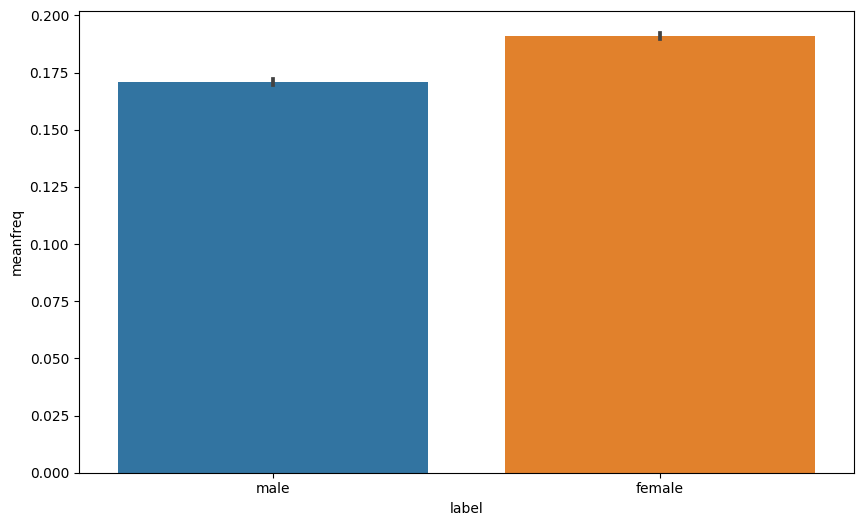

In [6]:
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'label', y = 'meanfreq', data = data)

<Axes: xlabel='label', ylabel='Q25'>

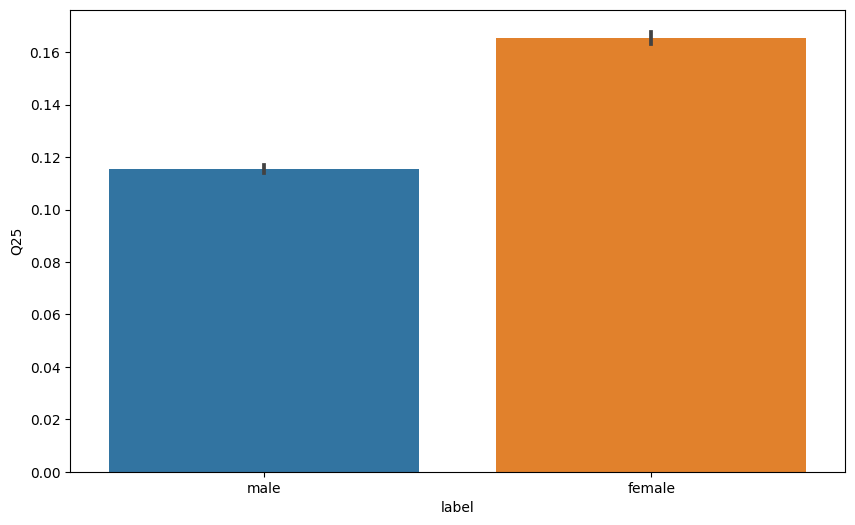

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'label', y = 'Q25', data = data)

<Axes: xlabel='label', ylabel='dfrange'>

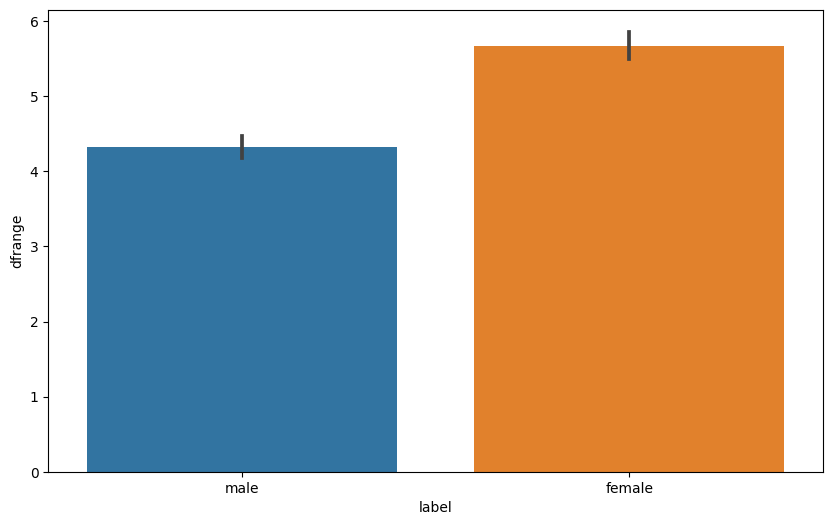

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'label', y = 'dfrange', data = data)

<Axes: xlabel='label', ylabel='sfm'>

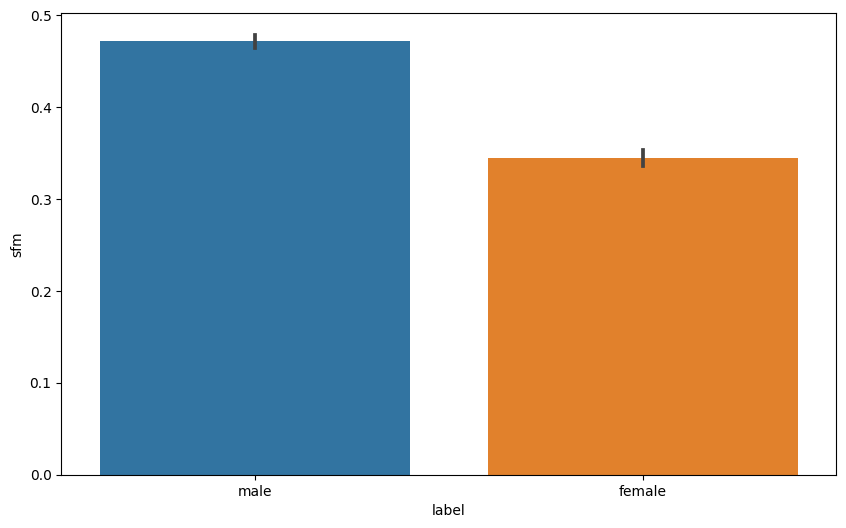

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'label', y = 'sfm', data = data)

In [10]:
X = data.drop('label',axis =1)
Y = data['label']

In [11]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [13]:
Y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [16]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle=True)

In [20]:
logreg = LogisticRegression(solver='lbfgs',max_iter=3000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [21]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[405,  78],
       [ 11, 457]])

In [25]:
from sklearn.metrics import classification_report
target_names = ['Male', 'Female']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Male       0.97      0.84      0.90       483
      Female       0.85      0.98      0.91       468

    accuracy                           0.91       951
   macro avg       0.91      0.91      0.91       951
weighted avg       0.91      0.91      0.91       951



In [26]:
logreg.coef_

array([[-6.00443620e-01,  1.47867365e+00, -8.43854568e-01,
        -5.08474699e+00,  2.76906906e+00,  7.85381605e+00,
        -3.98964282e-01,  1.13324562e-02,  4.20796877e+00,
        -1.80641779e-01,  7.24856308e-01, -6.00443620e-01,
        -1.53026196e+01,  1.04190888e-01, -2.17320477e+00,
        -1.82533203e-01, -5.38354822e-01, -2.82925162e-01,
         2.55429660e-01, -6.44958073e-01]])

In [28]:
X.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [30]:
logreg.score(X_train,y_train)

0.9070816418583671